## Data Preprocessing

## Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV



from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MaxAbsScaler

## Load csv data to Dataframe

In [56]:
data = pd.read_csv("data/alzheimers_disease_data.csv")

In [57]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [58]:
num_rows = data.shape[0]

In [59]:
num_rows

2149

In [60]:
data.drop(['DoctorInCharge'], axis=1, inplace=True)

In [61]:
data.to_csv("data/updated_data.csv", index=False)

In [62]:
df= pd.read_csv("data/updated_data.csv")

### CHECKING MISSING VALUES

This data set has no missing values.



In [63]:
df.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

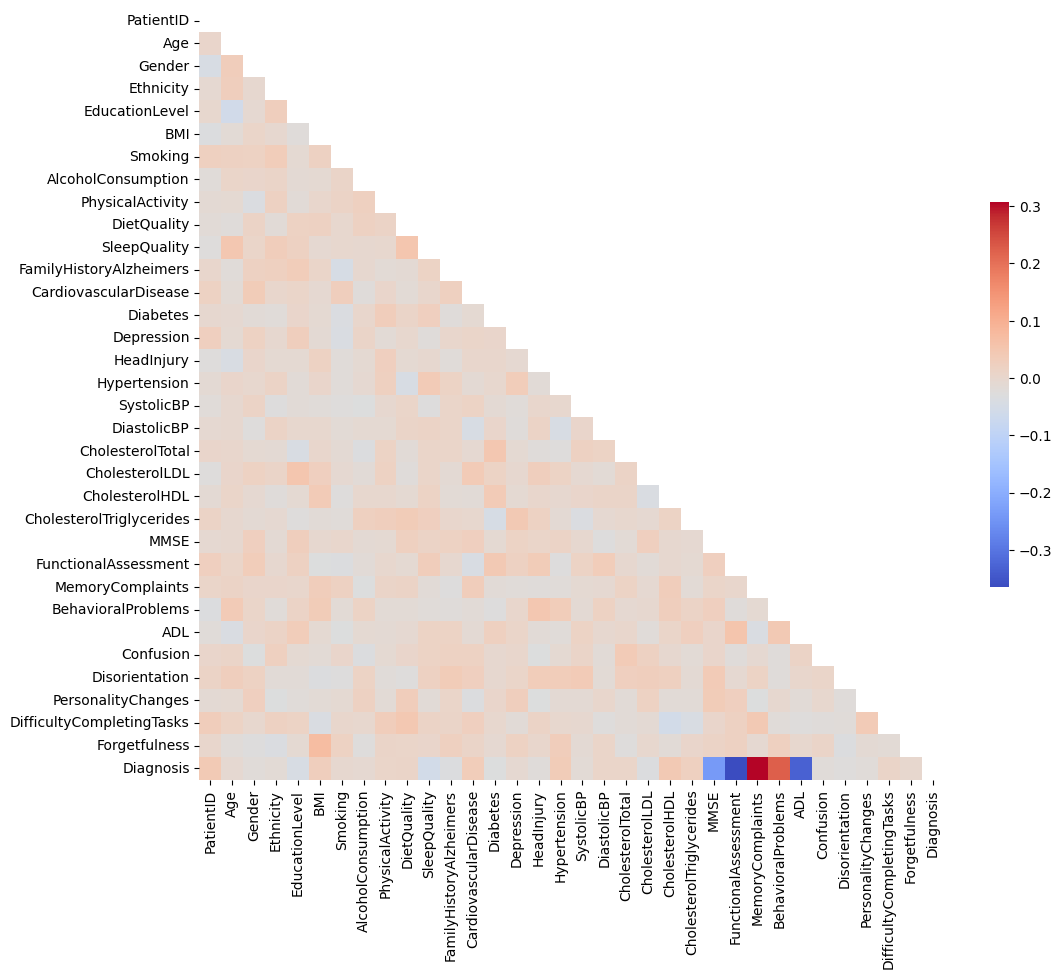

In [64]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(),cmap="coolwarm", cbar_kws={"shrink": .5}, mask=mask)

plt.show()

In [65]:
corr = df.corr()
diagnosis_corr = corr["Diagnosis"].sort_values(ascending=False)
print(diagnosis_corr)

Diagnosis                    1.000000
MemoryComplaints             0.306742
BehavioralProblems           0.224350
CholesterolHDL               0.042584
PatientID                    0.041019
Hypertension                 0.035080
CardiovascularDisease        0.031490
BMI                          0.026343
CholesterolTriglycerides     0.022672
DifficultyCompletingTasks    0.009069
DietQuality                  0.008506
CholesterolTotal             0.006394
PhysicalActivity             0.005945
DiastolicBP                  0.005293
Forgetfulness               -0.000354
Smoking                     -0.004865
Age                         -0.005488
Depression                  -0.005893
AlcoholConsumption          -0.007618
Ethnicity                   -0.014782
SystolicBP                  -0.015615
Confusion                   -0.019186
PersonalityChanges          -0.020627
Gender                      -0.020975
HeadInjury                  -0.021411
Disorientation              -0.024648
Diabetes    

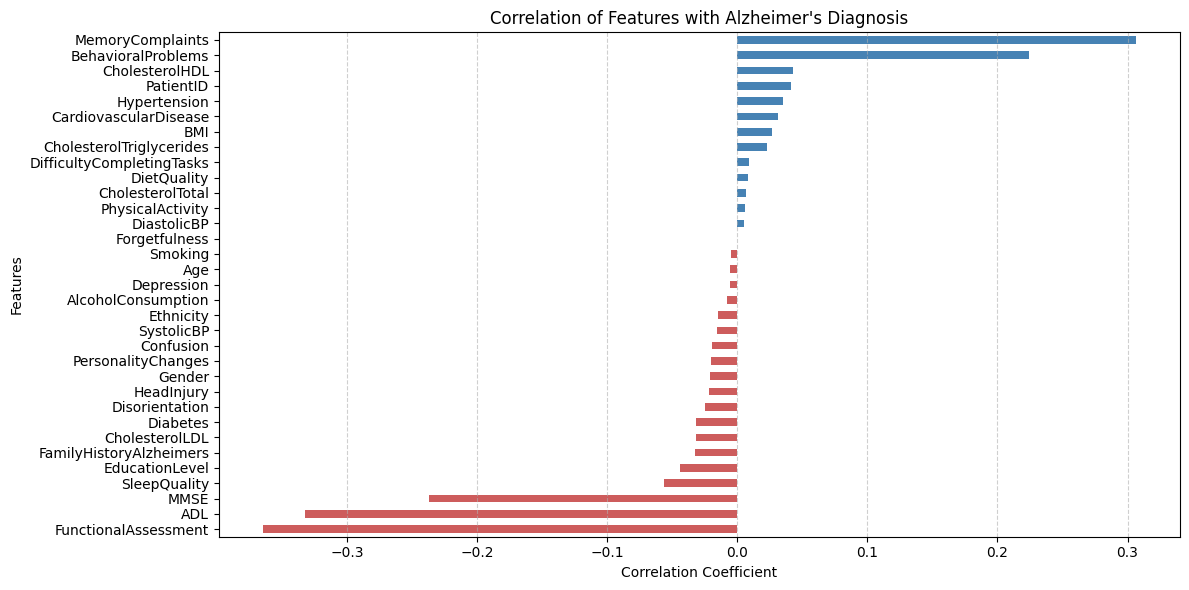

In [66]:
corr_target = diagnosis_corr.drop('Diagnosis').sort_values()
colors = ['indianred' if v < 0 else 'steelblue' for v in corr_target]

plt.figure(figsize=(12, 6))
corr_target.plot(kind='barh', color=colors)
plt.title("Correlation of Features with Alzheimer's Diagnosis")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Observations from Exploring Correlations**
As observed, Three numerical features—Functional Assessment, ADL (Activities of Daily Living), and MMSE (Mini-Mental State Examination)—demonstrate negative correlations with the diagnosis, with correlation coefficients of -0.36, -0.33, and -0.23, respectively.
This suggests that lower scores in these assessments are associated with a higher likelihood of having Alzheimer’s disease.

Two categorical variables—Behavioral Problems and Memory Complaints—show positive correlations of 0.22 and 0.30, respectively.
This indicates that the presence of these issues is more commonly observed in individuals who are diagnosed with Alzheimer’s.

In [67]:
corr = df.corr()
diagnosis_corr = corr["Diagnosis"].sort_values(ascending=False)

In [68]:
corr

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
PatientID,1.000000,0.002947,-0.043665,-0.007608,-0.001729,-0.034228,0.021907,-0.020733,-0.011424,-0.018490,...,0.025033,0.005748,-0.033700,-0.019787,0.004430,0.010772,-0.011987,0.029727,0.001448,0.041019
Age,0.002947,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,-0.043665,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,...,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,-0.007608,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,...,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.001729,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,...,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.034228,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.021907,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,-0.020733,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.011424,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.018490,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506


In [69]:
strong_features = diagnosis_corr[diagnosis_corr.abs() >= 0.1].drop("Diagnosis").index.tolist()
print("Strong features:", strong_features)

Strong features: ['MemoryComplaints', 'BehavioralProblems', 'MMSE', 'ADL', 'FunctionalAssessment']


In [70]:
irrelevant_features = diagnosis_corr[diagnosis_corr.abs() <= 0.1].index.tolist()
data_cleaned = data.drop(columns=irrelevant_features)
print ("irrelevant_features:", irrelevant_features)

irrelevant_features: ['CholesterolHDL', 'PatientID', 'Hypertension', 'CardiovascularDisease', 'BMI', 'CholesterolTriglycerides', 'DifficultyCompletingTasks', 'DietQuality', 'CholesterolTotal', 'PhysicalActivity', 'DiastolicBP', 'Forgetfulness', 'Smoking', 'Age', 'Depression', 'AlcoholConsumption', 'Ethnicity', 'SystolicBP', 'Confusion', 'PersonalityChanges', 'Gender', 'HeadInjury', 'Disorientation', 'Diabetes', 'CholesterolLDL', 'FamilyHistoryAlzheimers', 'EducationLevel', 'SleepQuality']


In [71]:
final_data = data[strong_features + ["Diagnosis"]]

In [72]:
final_data

,MemoryComplaints,BehavioralProblems,MMSE,ADL,FunctionalAssessment,Diagnosis
0,0,0,21.463532,1.725883,6.518877,0
1,0,0,20.613267,2.592424,7.118696,0
2,0,0,7.356249,7.119548,5.895077,0
3,0,1,13.991127,6.481226,8.965106,0
4,0,0,13.517609,0.014691,6.045039,0
...,...,...,...,...,...,...
2144,0,0,1.201190,4.492838,0.238667,1
2145,0,1,6.458060,9.204952,8.687480,1
2146,0,0,17.011003,5.036334,1.972137,1
2147,0,0,4.030491,3.785399,5.173891,1


In [73]:
final_data.to_csv("data/alzheimers_disease_cleaned.csv", index=False)

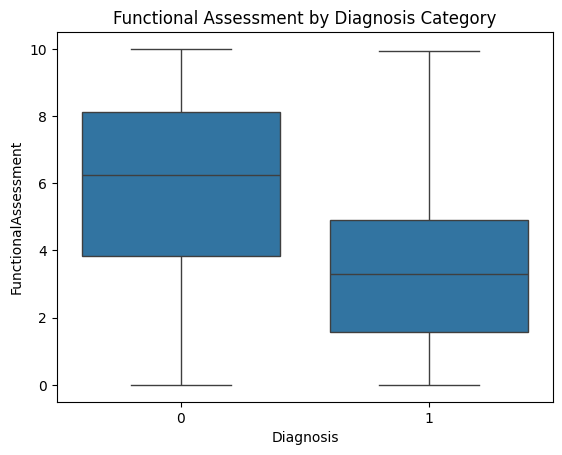

In [74]:
sns.boxplot(final_data, y='FunctionalAssessment', x='Diagnosis')
plt.title('Functional Assessment by Diagnosis Category')
plt.show()

The boxplot clearly shows that individuals diagnosed with Alzheimer’s tend to have lower Functional Assessment scores compared to those without a diagnosis. This supports the correlation analysis, suggesting that decreased functional ability is a significant indicator of Alzheimer's disease.

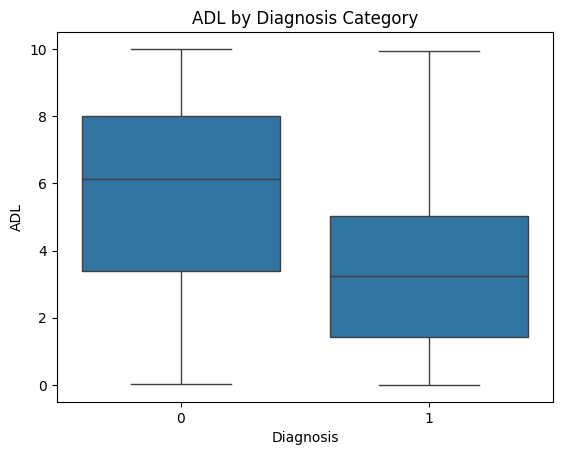

In [75]:
sns.boxplot(final_data, y='ADL', x='Diagnosis')
plt.title('ADL by Diagnosis Category')
plt.show()

The boxplot shows that individuals diagnosed with Alzheimer’s generally have lower ADL scores, reflecting greater difficulty with daily living tasks. This supports its negative correlation with diagnosis and highlights ADL as an important functional marker for early detection of Alzheimer’s disease.

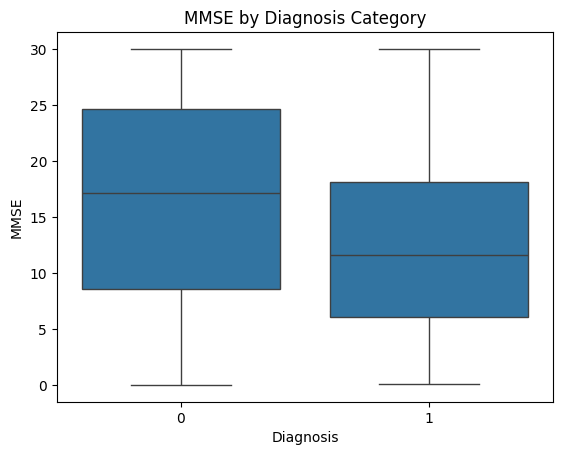

In [76]:
sns.boxplot(final_data, y='MMSE', x='Diagnosis')
plt.title('MMSE by Diagnosis Category')
plt.show()

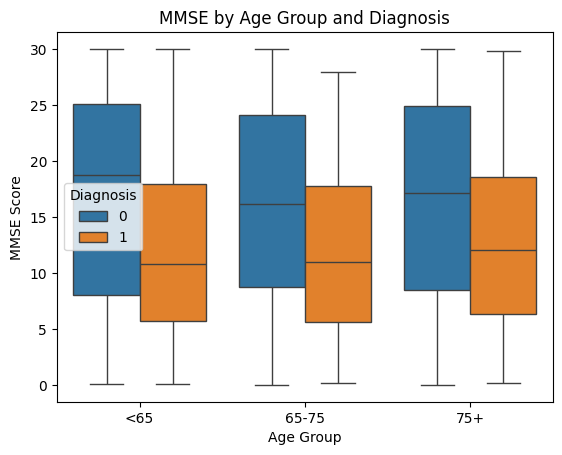

In [77]:
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 65, 75, 90], labels=['<65', '65-75', '75+'])

sns.boxplot(data=data, x='Age_Group', y='MMSE', hue='Diagnosis')
plt.title('MMSE by Age Group and Diagnosis')
plt.xlabel('Age Group')
plt.ylabel('MMSE Score')
plt.show()

This boxplot compares MMSE scores across age groups for both diagnosed and non-diagnosed individuals.
Regardless of age, people diagnosed with Alzheimer’s consistently have lower MMSE scores, confirming MMSE’s value as a key indicator of cognitive decline.
The gap between diagnosed and non-diagnosed individuals is visible in all age groups, reinforcing that cognitive decline—not just age—is the stronger predictor of diagnosis.

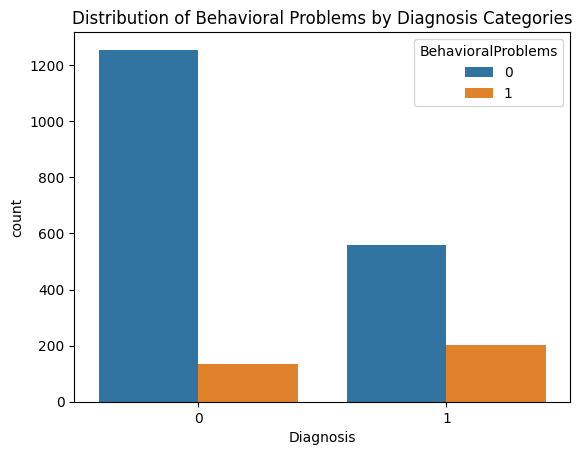

In [78]:
sns.countplot(final_data, x='Diagnosis', hue='BehavioralProblems')
plt.title(f'Distribution of Behavioral Problems by Diagnosis Categories')
plt.show()

This chart compares the presence of behavioral problems between individuals with and without an Alzheimer’s diagnosis.

Most individuals without Alzheimer's (Diagnosis = 0) do not have behavioral problems.

In contrast, a larger proportion of individuals diagnosed with Alzheimer’s (Diagnosis = 1) show behavioral problems.

Although not all diagnosed individuals exhibit behavioral issues, the data shows that behavioral problems are more commonly found among those with Alzheimer’s.

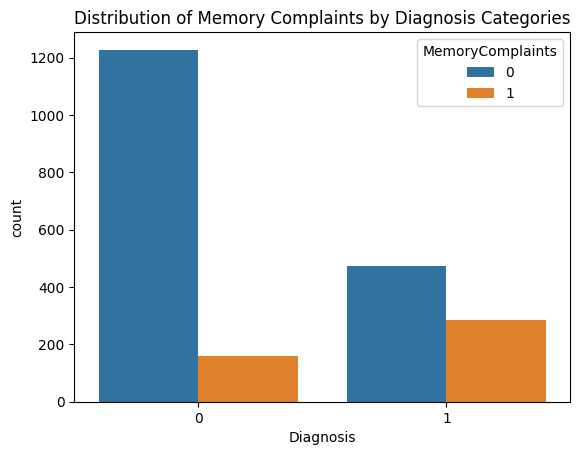

In [79]:
sns.countplot(final_data, x='Diagnosis', hue='MemoryComplaints')
plt.title(f'Distribution of Memory Complaints by Diagnosis Categories')
plt.show()

This chart shows that memory complaints are more common in individuals diagnosed with Alzheimer’s than those without the disease.

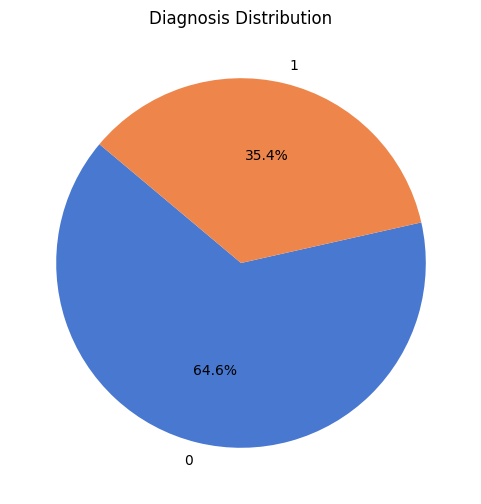

In [80]:
categories = [0, 1]
counts = final_data.Diagnosis.value_counts().tolist()
colors = sns.color_palette("muted")
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Diagnosis Distribution')
plt.show()

The dataset is moderately imbalanced, with more healthy individuals than diagnosed cases.

# SHAP Plot

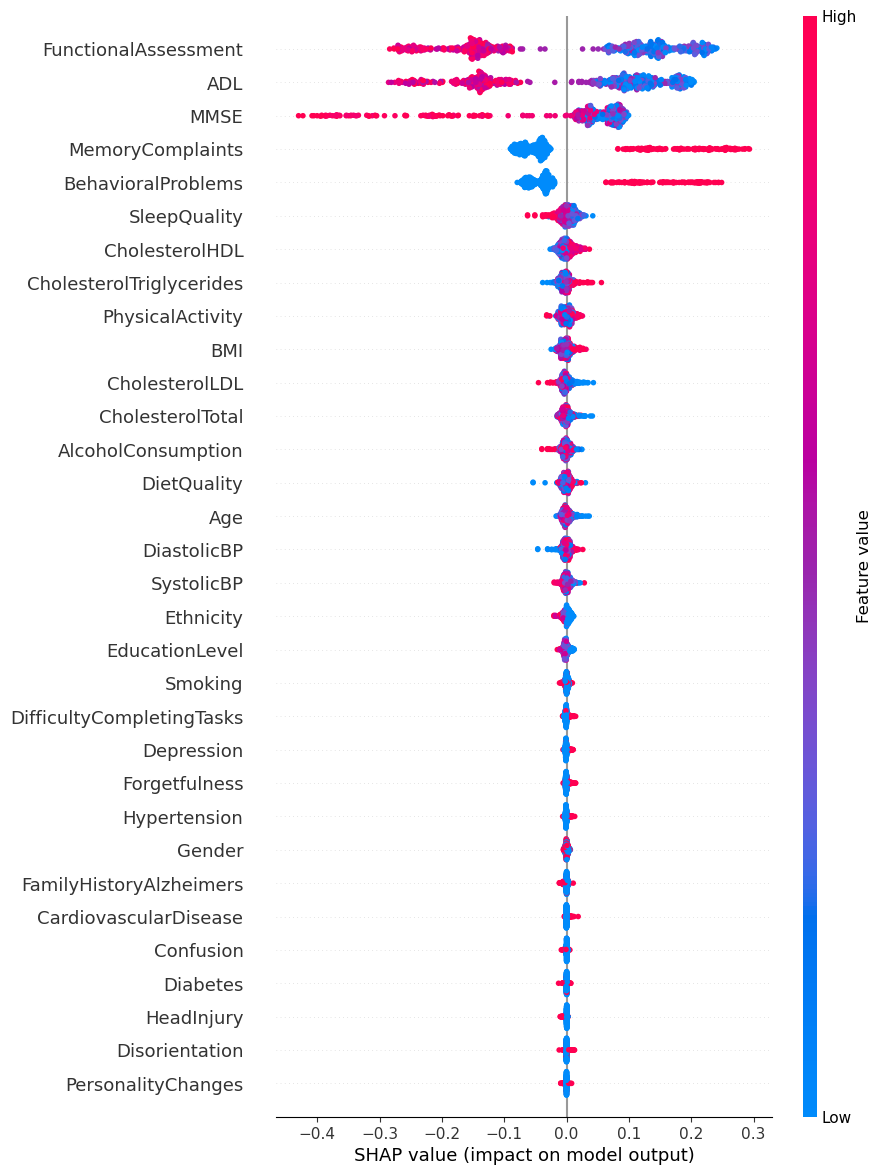

In [9]:
shap.initjs()

#import data
df_raw = pd.read_csv("alzheimers_disease_data_oversampled.csv")

#remove PatientID and DoctorInCharge cols so they don't get used in RF
df_raw.drop(["PatientID","DoctorInCharge"], axis=1, inplace=True)

#create X and y variables
df_train = df_raw.drop(["Diagnosis"],axis=1)
df_test = df_raw["Diagnosis"]

#Normalize data
scaler = MaxAbsScaler()
train_scaler = scaler.fit_transform(df_train)
df_norm = pd.DataFrame(train_scaler)
df_norm.columns = df_train.columns

#Create train/test split
x_train, x_test, y_train, y_test = train_test_split(df_norm, df_test, 
                                                    test_size=0.2, random_state=42)
#create rf classifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)
y_pred = clf.predict(x_test)

#create SHAP values
explainer = shap.Explainer(clf, x_test)
shap_values = explainer(x_test,check_additivity=False)

#plot SHAP
shap.plots.beeswarm(shap_values[:, :, 1], max_display=33)